In [1]:
from IPython.display import display
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline
font_name = font_manager.FontProperties(fname="C://Windows//Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 선형 모델(Linear model)

* 100여 년 전에 개발
* 현재에도 널리 쓰임
* 입력 특성에 대한 선형 함수를 만들어 예측을 수행

 ## 회귀의 선형 모델
 선형 모델을 위한 일반화된 예측 함수
 
 $\hat{y} = w_0 \times x_0+w_1 \times x_1+...+w_p \times x_p+b$

w[0]: 0.393906  b: -0.031804


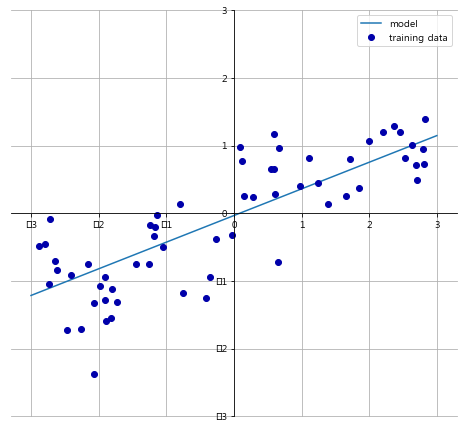

In [2]:
mglearn.plots.plot_linear_regression_wave()

* 특성이 하나일 땐 직선
* 두 개일 땐 평면
* 더 높은 차원에서는 초평면(hyperplane)

### 선형 회귀(최소제곱법)
* 가장 간단하고 오래된 회귀용 선형 알고리즘
* 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터 $w$(가중치)와 $b$(편향)를 찾음
* MSE(평균제곱오차) = $\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y_i})^2$, n은 샘플 개수

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)

# 1차원 wave 데이터셋
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_)) # 가중치
print("lr.intercept_: {}".format(lr.intercept_)) # 편향

lr.coef_: [ 0.39390555]
lr.intercept_: -0.03180434302675973


* 가중치는 lr 객체의 coef_ 속성에 저장되어 있다.
* 편향 또는 절편 파라미터는 intercept_ 속성에 저장되어 있다.
* 1차원 wave 데이터셋은 특성이 하나라서 가중치가 하나 (직선)

In [4]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


* $R^2$값이 0.66인 것은 그리 좋은 결과가 아님
* 하지만 훈련 세트와 테스트 세트의 점수가 매우 비슷
* 이는 과소적합 상태

In [5]:
# 특성이 많은 고차원 데이터셋(보스턴 주택 가격 데이터셋)
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


* 훈련 세트에서 $R^2$값이 매우 높고, 테스트 세트에서 $R^2$값이 매우 낮다
* 훈련 세트와 테스트 세트의 성능 차이가 크다
* 이는 과대적합 상태
* 복잡도를 제어할 수 있는 모델을 사용해야 한다.

### 릿지 회귀(Ridge)
* 선형 모델로 최소적합법에서 사용한 것과 같은 예측 함수를 사용.
* 가중치($w$)의 절대값을 가능한 한 작게 만든다. (0에 가깝게)
* 이는 모든 특성이 출력에 주는 영향을 최소한으로 만든다. (기울기를 작게 만듦)
* 이런 제약을 규제(regularization)라고 한다.
* 규제는 과대적합이 되지 않도록 모델을 강제로 제한하는 것 이다.
* 릿지 회귀에 사용하는 규제 방식을 L2 규제라고 한다.

In [6]:
from sklearn.linear_model import Ridge

# 릿지 회귀로 보스턴 주택 가격 데이터셋 적용
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


* 훈련 세트와 테스트 세트의 차이가 적어짐
* 선형 회귀는 이 데이터셋에 과대적합되지만,
Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어짐
* 주 관심사는 테스트 세트의 성능이기 때문에 LinearRegression 보다는 Ridge 모델 선택해야 함
* 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화 할지 지정할 수 있음
* 아주 작은 alpha 값은 LinearRegression 모델과 같아지게 한다.

In [7]:
# alpha 값을 10으로 했을 때
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [8]:
# alpha 값을 0.1로 했을 때
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


* 이 코드에서는 alpha = 0.1 일 때 꽤 좋은 성능을 낸 것 같다.

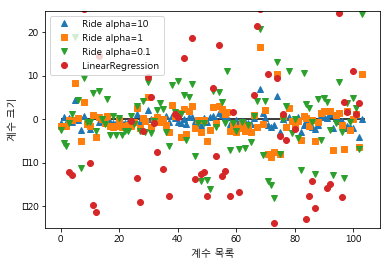

In [9]:
plt.plot(ridge10.coef_, '^', label="Ride alpha=10")
plt.plot(ridge.coef_, 's', label="Ride alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ride alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

* x 축은 coef_의 원소를 위치대로 나열한 것이다.
* 높은 alpha 값일 때 coef_(가중치)의 절대값 크기가 더 커진다.
* alpha가 10일 때는 대부분의 계수가 -3과 3 사이다.
* alpha가 0인 선형 회귀의 계수는 그림 밖으로 넘어갈 정도로 크다

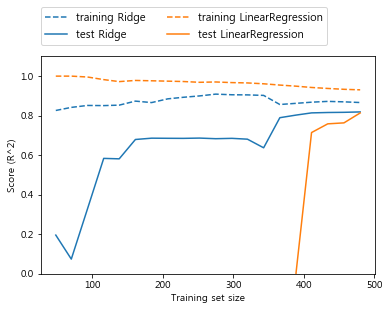

In [10]:
mglearn.plots.plot_ridge_n_samples()

* alpha 값을 고정하고 훈련 데이터의 크기를 변환(학습 곡선 learning curve)
* 릿지와 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높다.
* 릿지는 규제가 적용되므로 훈련데이터 점수가 전체적으로 선형회귀보다 낮다.
* **작은 데이터셋**에서는 **릿지**의 테스트 점수가 더 **높다**.
* 선형 회귀는 400 미만에서는 학습하지 못하고 있다.
* 두 모델의 성능은 데이터가 많이질수록 좋아진다.(마지막에는 비슷)
* **데이터를 충분히 주면 규제 항은 덜 중요**해진다는 것을 볼 수 있다.
* 데이터가 많아질수록 선형 회귀 모델이 데이터를 기억하거나 과대적합하기 어려워서 성능이 감소한다.

### 라쏘(Lasso)
* 선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있다.
* 릿지와 같이 계수를 0에 가깝게 만들려고 한다.
* 하지만 라쏘를 사용할 때 어떤 계수는 정말 0이 된다.(L1 규제)
* 이 말은 완전히 제외되는 특성이 생긴다는 뜻이다.
* 특성 선택(feature selection)이 자동으로 이뤄진다고 볼 수 있다.
* 이는 모델을 이해하기 쉬워지고 이 모델의 가장 중요한  특성이 무엇인지 드러내준다.
---
* Lasso는 L1, L2 규제를 함께 쓰는 엘라스틱넷(Elastic-Net) 방식에서 L2 규제가 빠진 것.
* alpha 매개변수는 R의 엘라스틱넷 패키지인 glmnet의 lambda 매개변수와 같은 의미
* 이들은 한 특성씩 좌표축을 따라 최적화하는 좌표 하강법(coordinate descent)을 반복적으로 학습함.
* alpha 값을 줄이면 가장 낮은 오차를 찾아가는 이 반복 횟수가 늘어 남.
* 따라서 alpha 값을 줄이면 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 함

In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {:.2f}".format(np.sum(lasso.coef_ != 0)))
print("반복 횟수: {}".format(lasso.n_iter_))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 수 : 4.00
반복 횟수: 34


* 105개의 특성 중 4개만 사용한 것으로 보임(과소적합)
* 과소적합을 줄이기 위해 alpha 매개변수를 줄여야 함

In [12]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso001.coef_ != 0)))
print("반복 횟수: {}".format(lasso001.n_iter_))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 수 : 33
반복 횟수: 1863


* alpha 값을 낮춰서 모델의 복잡도는 증가하고 훈련 세트와 테스트세트의 성능이 좋아짐
* 성능은 Ridge보다 조금 좋아짐 
* 사용된 특성이 105개 중 33개 뿐이어서 모델을 분석하기 조금 더 쉬워졌을 것으로 예상

In [13]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso00001.coef_ != 0)))
print("반복 횟수: {}".format(lasso00001.n_iter_))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 수 : 94
반복 횟수: 42005


* alpha 값을 너무 낮추면 규제의 효과가 없어져 과대적합이 됨
* LinearRegression의 결과와 비슷해 짐

Text(0,0.5,'계수 크기')

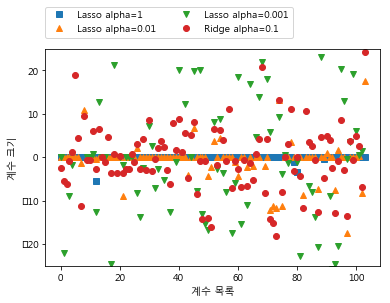

In [14]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

* alpha=1 일 때 계수 대부분이 0, 나머지도 계수들도 크기가 작다
* alpha=0.01로 줄면 대부분의 특성이 0이 되는 분포
* alpha=0.0001이 되면 계수 대부분이 0이 아니고 값도 커져 꽤 규제받지 않은 모델이 됨
* Ridge alpha=0.1 모델은 Lasso alpha-0.01 모델과 성능이 비슷하지만 Ridge를 사용하면 어떤 계수도 0이 되지 않음
-------------
* 실제로 이 두 모델 중 보통은 Ridge를 선호
* 하지만 특성이 많고 그중 일부분만 중요하다면 Lasso가 더 좋다
* scikit-learn은 Lasso와 Ridge의 페널티를 결합한 ElasticNet도 제공
* 하지만 성능을 내려면 L1과 L2 규제를 위한 매개변수를(두개) 조정해야함